In [1]:
!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

SO THIS IS A CLASSIFICATION PROBLEM STATEMENT. SO WE HAVE TO CONVERT TARGET NUMERICAL VARIABLE TO CATEGORICAL VARIABLE

EDA

In [5]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
#converting target numerical value to categorical value
g={'<=50K' : 0, '>50K' : 1 }
df['income']=df['income'].map(g)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


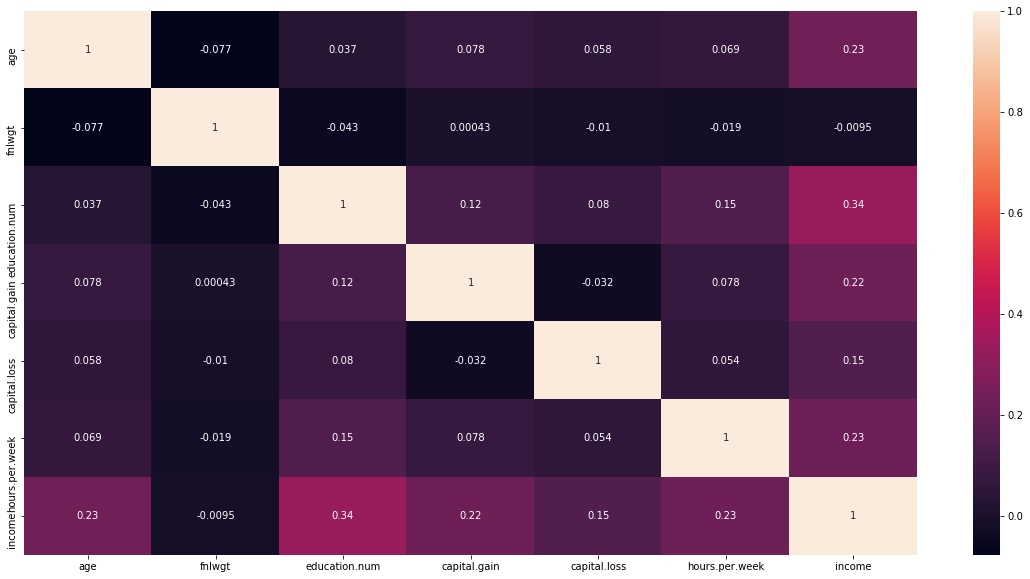

In [7]:
plt.figure(figsize= (20, 10))
sns.heatmap(df.corr(), annot=True)

In [8]:
#This shows us the dataset is completely imbalanced dataset
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

HANDLING MISSING VALUES

In [9]:
df=df.replace('?', np.NaN)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [12]:
df.workclass.unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
df.occupation.unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [14]:
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [15]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [18]:
df['workclass']=df['workclass'].fillna('Private')
df['occupation']=df['occupation'].fillna('Other')
df['native.country']=df['native.country'].fillna('United-States')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Other,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Other,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11f8af7a90>,
      dtype=object)

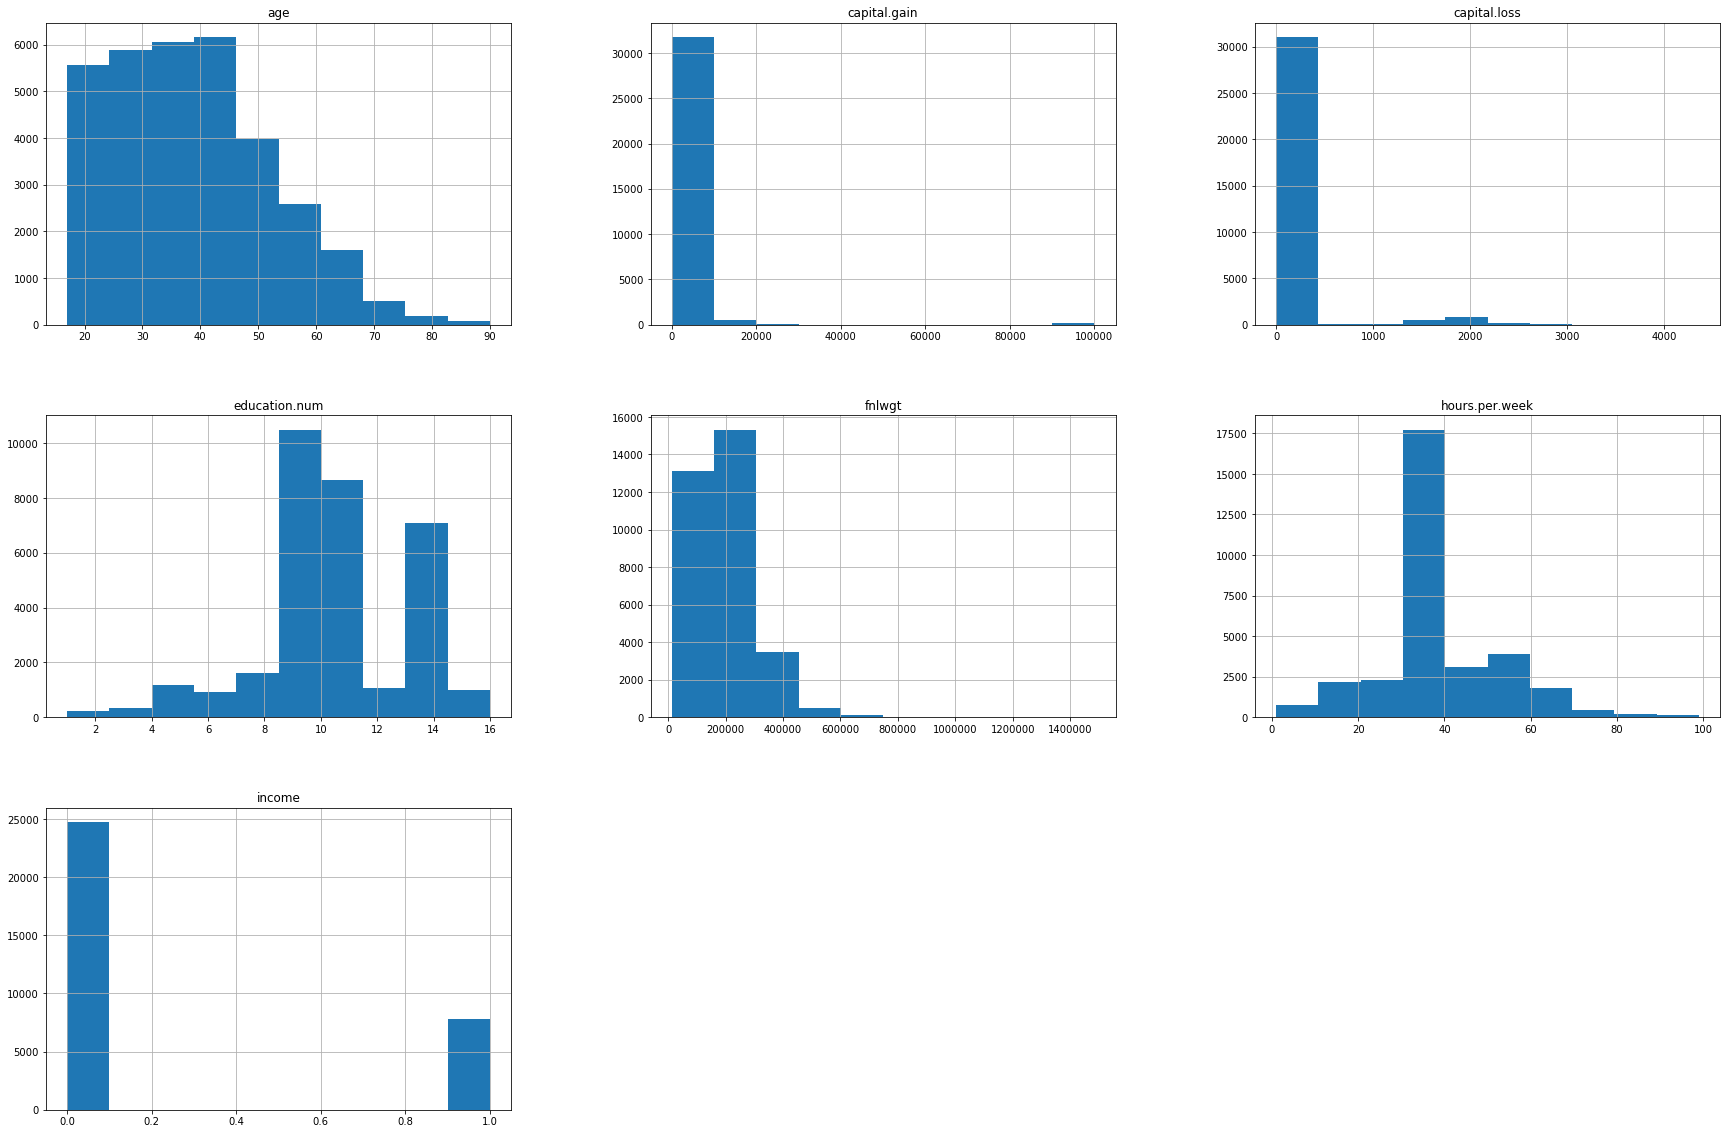

In [20]:
df.hist(figsize=(30,20))

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [22]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [23]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [25]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [26]:
df.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [27]:
col = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [28]:
df['native.country'].value_counts().to_dict()

{'United-States': 29753,
 'Mexico': 643,
 'Philippines': 198,
 'Germany': 137,
 'Canada': 121,
 'Puerto-Rico': 114,
 'El-Salvador': 106,
 'India': 100,
 'Cuba': 95,
 'England': 90,
 'Jamaica': 81,
 'South': 80,
 'China': 75,
 'Italy': 73,
 'Dominican-Republic': 70,
 'Vietnam': 67,
 'Guatemala': 64,
 'Japan': 62,
 'Poland': 60,
 'Columbia': 59,
 'Taiwan': 51,
 'Haiti': 44,
 'Iran': 43,
 'Portugal': 37,
 'Nicaragua': 34,
 'Peru': 31,
 'Greece': 29,
 'France': 29,
 'Ecuador': 28,
 'Ireland': 24,
 'Hong': 20,
 'Trinadad&Tobago': 19,
 'Cambodia': 19,
 'Thailand': 18,
 'Laos': 18,
 'Yugoslavia': 16,
 'Outlying-US(Guam-USVI-etc)': 14,
 'Honduras': 13,
 'Hungary': 13,
 'Scotland': 12,
 'Holand-Netherlands': 1}

In [29]:
for feature in col:
    labels_ordered=df[feature].value_counts().to_dict()
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,0,9,4,7,1,0,1,0,4356,40,0,0
1,82,0,132870,0,9,4,2,1,0,1,0,4356,18,0,0
2,66,0,186061,1,10,4,7,3,1,1,0,4356,40,0,0
3,54,0,140359,8,4,2,6,3,0,1,0,3900,40,0,0
4,41,0,264663,1,10,3,0,2,0,1,0,3900,40,0,0


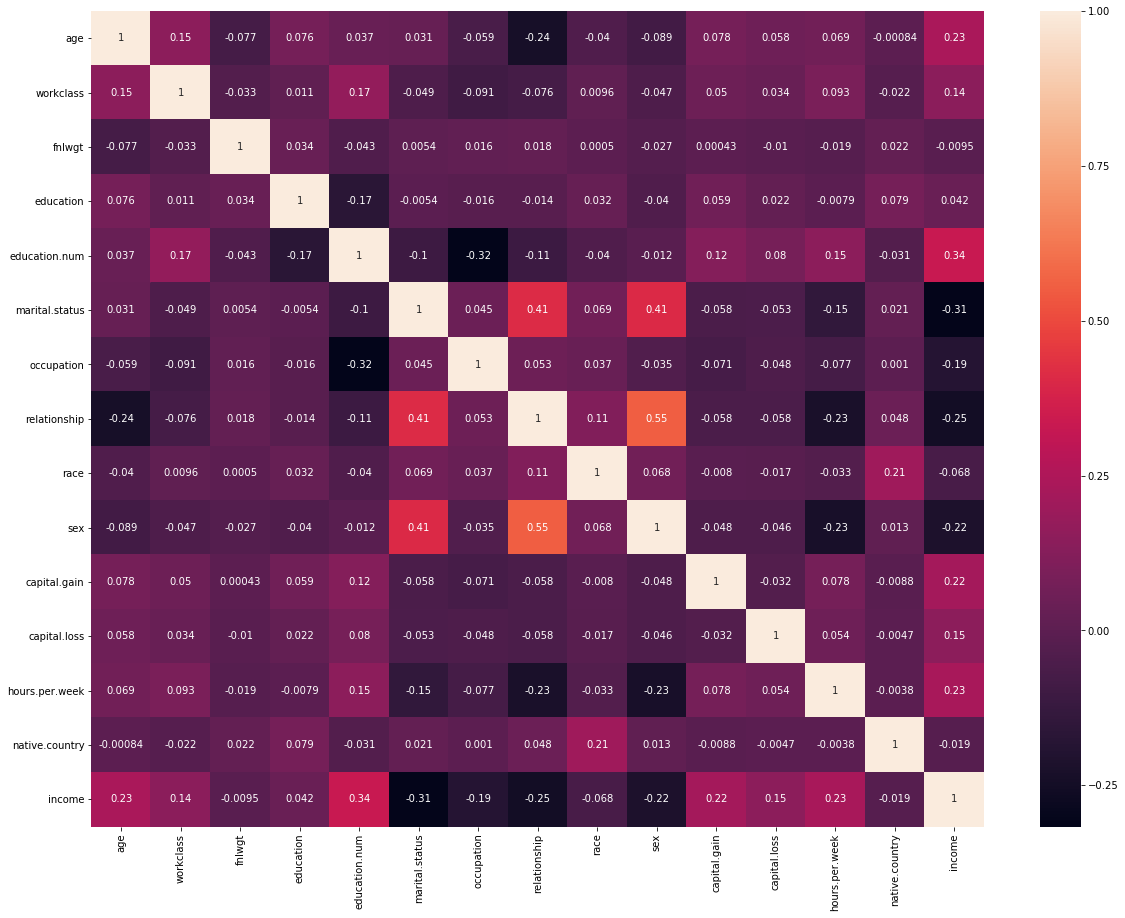

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

FEATURE SCALING

In [31]:
scale_data=[feature for feature in df.columns if feature not in ['income']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[scale_data]=scaler.fit_transform(df[scale_data])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,0.0,0.043987,0.000000,0.533333,0.666667,0.500000,0.2,0.00,1.0,0.0,1.000000,0.397959,0.0,0
1,0.890411,0.0,0.081896,0.000000,0.533333,0.666667,0.142857,0.2,0.00,1.0,0.0,1.000000,0.173469,0.0,0
2,0.671233,0.0,0.118021,0.066667,0.600000,0.666667,0.500000,0.6,0.25,1.0,0.0,1.000000,0.397959,0.0,0
3,0.506849,0.0,0.086982,0.533333,0.200000,0.333333,0.428571,0.6,0.00,1.0,0.0,0.895317,0.397959,0.0,0
4,0.328767,0.0,0.171404,0.066667,0.600000,0.500000,0.000000,0.4,0.00,1.0,0.0,0.895317,0.397959,0.0,0


In [32]:
x = df.drop(['income'], axis=1)
y = df.income

In [33]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.000000,0.0,0.043987,0.000000,0.533333,0.666667,0.500000,0.2,0.00,1.0,0.0,1.000000,0.397959,0.0
1,0.890411,0.0,0.081896,0.000000,0.533333,0.666667,0.142857,0.2,0.00,1.0,0.0,1.000000,0.173469,0.0
2,0.671233,0.0,0.118021,0.066667,0.600000,0.666667,0.500000,0.6,0.25,1.0,0.0,1.000000,0.397959,0.0
3,0.506849,0.0,0.086982,0.533333,0.200000,0.333333,0.428571,0.6,0.00,1.0,0.0,0.895317,0.397959,0.0
4,0.328767,0.0,0.171404,0.066667,0.600000,0.500000,0.000000,0.4,0.00,1.0,0.0,0.895317,0.397959,0.0


In [34]:
x.shape, y.shape

((32561, 14), (32561,))

TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

MODEL CREATION

RANDOM FOREST CLASSIFIER

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_leaf=2, random_state=1)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8704130201136189

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4736,  194],
       [ 650,  933]])

LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4930
           1       0.75      0.53      0.62      1583

    accuracy                           0.84      6513
   macro avg       0.80      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513

[[4646  284]
 [ 746  837]]
accuracy is 0.8418547520343928


RANDOM FOREST gives me better accuracy compared to LOGISTIC REGRESSION